In [1]:
from sympy import MatrixSymbol, BlockMatrix, ZeroMatrix, symbols, Identity, block_collapse
from sympy import DiagonalMatrix, init_printing, S, Matrix, eye
from sympy import cos, sin, tan, Dummy, I
from sympy import solve, sqrt, conjugate, fraction
from sympy.physics.quantum import Dagger
init_printing()

# Three generation case

In [2]:
n = 3
mD = MatrixSymbol('m_D', n,n)
M = MatrixSymbol('M', n,n)
#MD = DiagonalMatrix(MD)
mu = MatrixSymbol(r'mu', n,n)
#mu = DiagonalMatrix(mu)
Z3 = ZeroMatrix(n,n)
Z6 = ZeroMatrix(2*n,2*n)
I3 = Identity(n)
I6 = Identity(2*n)
#epsilon = symbols(r'\epsilon', positive=True)

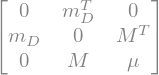

In [3]:
MLRiss_mMDmu = BlockMatrix(
    [
        [Z3, mD.T, Z3],
        [mD, Z3, M.T],
        [Z3, M, mu]
    ]
)
MLRiss_mMDmu

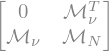

In [4]:
Mnu = MatrixSymbol(r'\mathcal{M}_{\nu}', 6,3)
MN = MatrixSymbol(r'\mathcal{M}_{N}', 6,6)
MLRiss_block = BlockMatrix(
    [
        [Z3, Mnu.T],
        [Mnu, MN]
    ]
)
MLRiss_block

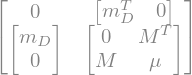

In [5]:
Mnu_explicit = BlockMatrix(
    [
        [mD],
        [Z3]
    ]
)
MN_explicit = BlockMatrix(
    [
        [Z3, M.T],
        [M, mu]
    ]
)
MLRiss_explicit = BlockMatrix(
    [
        [Z3, Mnu_explicit.T],
        [Mnu_explicit, MN_explicit]
    ]
)
MLRiss_explicit

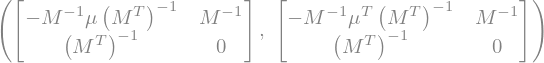

In [6]:
MN_inv_explicit = block_collapse(MN_explicit.inv())
MNT_inv_explicit = block_collapse(MN_explicit.T.inv())
MN_inv_explicit, MNT_inv_explicit

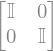

In [7]:
# test MN inversion
block_collapse(MN_explicit*MN_inv_explicit)

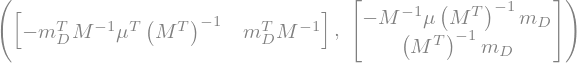

In [8]:
# F = (Mnu.T*MNT_inv)
F_explicit = block_collapse(Mnu_explicit.T*MNT_inv_explicit)
F_explicit, F_explicit.T

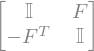

In [9]:
# WSS  in terms of F
F = MatrixSymbol('F', 3,6)
WSS = BlockMatrix(
    [
        [I3, F],
        [-F.T, I6]
    ]
)
WSS

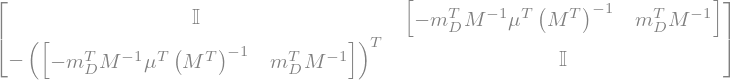

In [10]:
WSS_explicit = WSS.subs(F, F_explicit)
WSS_explicit

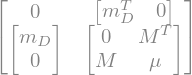

In [11]:
MLRiss_explicit

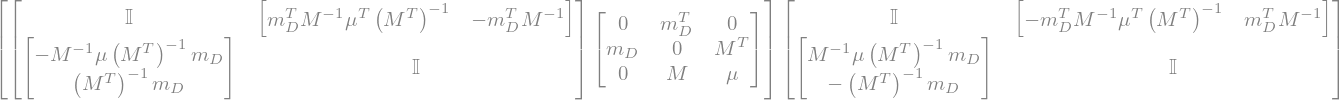

In [12]:
block_collapse(WSS_explicit.T*MLRiss_explicit*WSS_explicit)

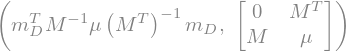

In [13]:
Mlight_explicit = block_collapse(-Mnu_explicit.T*MN_inv_explicit*Mnu_explicit)
Mheavy_explicit = block_collapse(MN_explicit) # + MN_explicit*MN_inv_explicit*Mnu_explicit*Mnu_explicit.T)
Mlight_explicit, Mheavy_explicit

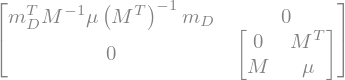

In [14]:
Z36 = ZeroMatrix(3,6)
Z63 = ZeroMatrix(6,3)
MLRiss_block_diag = BlockMatrix(
    [
        [Mlight_explicit, Z36],
        [Z63, Mheavy_explicit]
    ]
)
MLRiss_block_diag

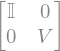

In [15]:
V66 = MatrixSymbol('V', 6,6)
WH = BlockMatrix(
    [
        [I3, Z36],
        [Z63, V66]
    ]
)
WH

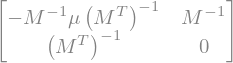

In [16]:
MN_inv_explicit

In [17]:
S_explict = -M.inv()*mu
S_explict

In [18]:
SST = (S_explict*S_explict.T).subs(M.T, M)
STS = (S_explict.T*S_explict).subs(M.T, M)

SST, STS

In [19]:
I3

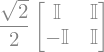

In [20]:
S = MatrixSymbol('S', 3,3)
OnesM = BlockMatrix(
    [
        [I3, I3],
        [-I3, I3]
    ]
)/sqrt(2)
OnesM

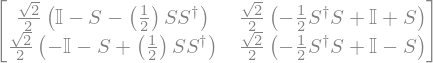

In [21]:

VS = OnesM*BlockMatrix(
    [
        [I3 - S*Dagger(S)/2, S],
        [-S, I3- Dagger(S)*S/2]
    ]
)
VS = block_collapse(VS)
VS

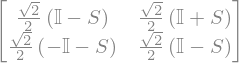

In [22]:
VS = block_collapse(VS.subs(S*Dagger(S), Z3).subs(Dagger(S)*S, Z3))
VS

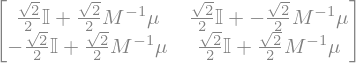

In [23]:
VS_explicit = VS.subs(S, S_explict).expand().subs(M.T, M).expand()
VS_explicit

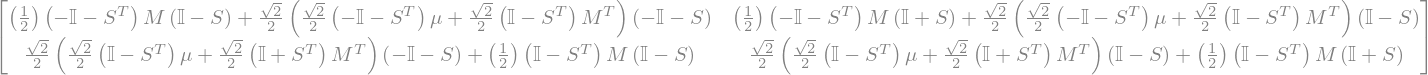

In [24]:
VSMheavyVS = block_collapse(VS.T*Mheavy_explicit*VS)
VSMheavyVS

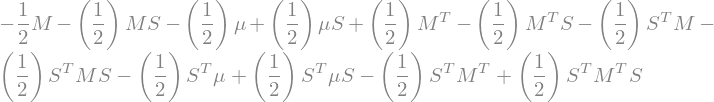

In [25]:
VSMheavyVS.blocks[0,1].expand()

In [26]:
STMTS = S.T*M.T*S
STMTS_simplify = (STMTS).subs(M.T, M).subs(S, S_explict).expand().subs(M.T, M) # neglectable mu << M
STMTS, STMTS_simplify

In [27]:
STMT = S.T*M.T
STMT_simplify = (STMT).subs(M.T, M).subs(S, S_explict).expand().subs(M.T, M).expand() # neglectable mu << M
STMT, STMT_simplify

In [28]:
STmuS = S.T*mu*S
STmuS_simplify = (STmuS).subs(S, S_explict).expand().subs(M.T, M) # neglectable mu << M
STmuS, STmuS_simplify

In [29]:
STmu = S.T*mu
STmu_simplify = (STmu).subs(S, S_explict).expand().subs(M.T, M) # neglectable mu << M
STmu, STmu_simplify

In [30]:
muS = mu*S
muS_simplify = (muS).subs(S, S_explict).expand().subs(M.T, M) # neglectable mu << M
muS, muS_simplify

In [31]:
STM = S.T*M
STM_simplify = (STM).subs(S, S_explict).expand().subs(M.T, M).expand() # neglectable mu << mD << M
STM, STM_simplify

In [32]:
MTS = M.T*S
MTS_simplify = (MTS).subs(S, S_explict).expand().subs(M.T, M).expand() # neglectable mu << mD << M
MTS, MTS_simplify

In [33]:
MS = M*S
MS_simplify = (MS).subs(S, S_explict).expand().subs(M.T, M).expand() # neglectable mu << mD << M
MS, MS_simplify

In [34]:
neglected_changes = {
    STMTS: Z3,
    STMT: Z3,
    STmuS: Z3,
    STmu: Z3,
    muS: Z3,
    STM: Z3,
    MTS: Z3,
    MS: Z3
}
neglected_changes

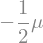

In [35]:
VSMheavyVS.blocks[0,1].expand().subs(neglected_changes).expand().subs(M.T, M).expand()

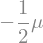

In [36]:
VSMheavyVS.blocks[1,0].expand().subs(neglected_changes).expand().subs(M.T, M).expand()

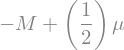

In [37]:
VSMheavyVS.blocks[0,0].expand().subs(neglected_changes).expand().subs(M.T, M).expand()

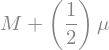

In [38]:
VSMheavyVS.blocks[1,1].expand().subs(neglected_changes).expand().subs(M.T, M).expand()

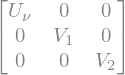

In [39]:
Unu = MatrixSymbol('U_{\\nu}', 3,3)
V1 = MatrixSymbol('V_1', 3,3)
V2 = MatrixSymbol('V_2', 3,3)
WB = BlockMatrix(
    [
        [Unu, Z3, Z3],
        [Z3, V1, Z3],
        [Z3, Z3, V2]
    ]
)
WB

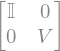

In [40]:
WH

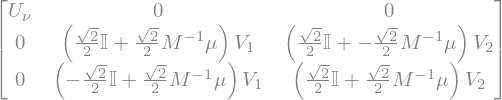

In [40]:
WHWB = block_collapse(WH*WB).subs(V66, VS_explicit).subs(Z63, BlockMatrix([
    [Z3],
    [Z3]
])).subs(Z36, BlockMatrix([
    [Z3, Z3]
]))
WHWB = block_collapse(WHWB)
WHWB

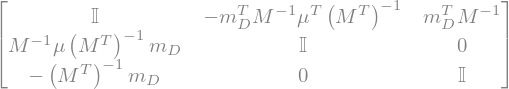

In [41]:
WSS_explicit2 = block_collapse(WSS_explicit).subs(I6, BlockMatrix(
    [
        [I3, Z3],
        [Z3, I3]
    ]
))
WSS_explicit2 = block_collapse(WSS_explicit2)
WSS_explicit2

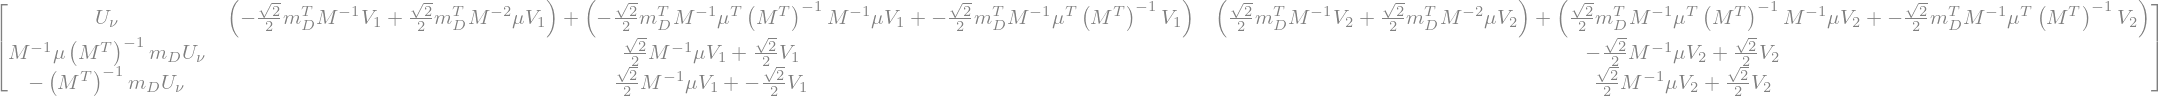

In [42]:
WSSWHWB = WSS_explicit2*WHWB
WSSWHWB = block_collapse(WSSWHWB).expand()
WSSWHWB

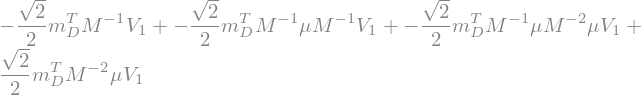

In [43]:
WSSWHWB.blocks[0,1].subs(M.T, M).expand().subs(mu.T, mu).expand()

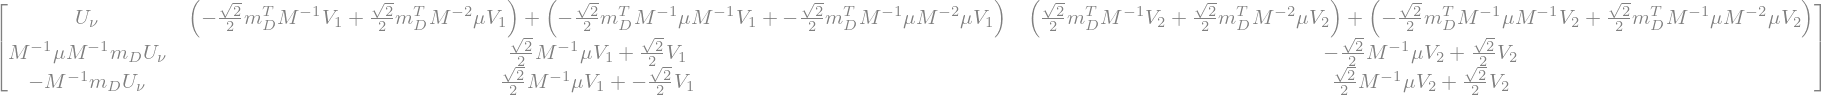

In [44]:
U = WSSWHWB.subs(M.T, M).expand().subs(mu.T, mu)
U

In [45]:
U.blocks[1,0].subs(M.T, M).expand().subs(mu.T, mu).expand()

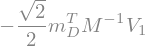

In [46]:
U01 = U.blocks[0,1].subs(M.T, M).expand().subs(mu.T, mu).expand().args[0]
U01

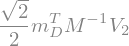

In [47]:
U02 = U.blocks[0,2].subs(M.T, M).expand().subs(mu.T, mu).expand().args[0]
U02

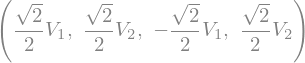

In [48]:
U11 = U.blocks[1,1].subs(M.T, M).expand().subs(mu.T, mu).expand().args[0]
U12 = U.blocks[1,2].subs(M.T, M).expand().subs(mu.T, mu).expand().args[0]
U21 = U.blocks[2,1].subs(M.T, M).expand().subs(mu.T, mu).expand().args[0]
U22 = U.blocks[2,2].subs(M.T, M).expand().subs(mu.T, mu).expand().args[0]
U11, U12, U21, U22

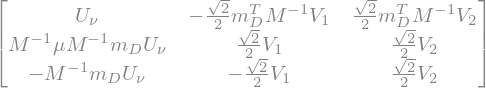

In [49]:
U_approx = BlockMatrix(
    [
        [Unu, U01, U02],
        [U.blocks[1, 0], U11, U12],
        [U.blocks[2, 0], U21, U22]
    ]
)
U_approx

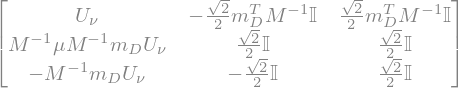

In [50]:
U_approx2 = U_approx.subs(V1, I3).subs(V2, I3)
U_approx2

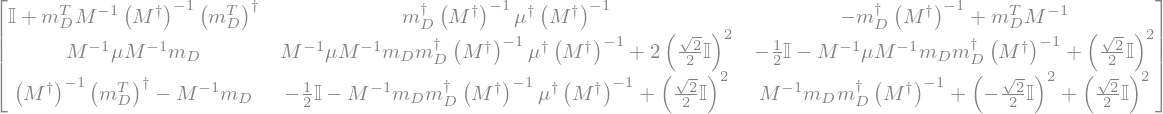

In [51]:
block_collapse(U_approx2*Dagger(U_approx2)).subs(Unu*Dagger(Unu), I3).simplify()

In [52]:
Msqrt = MatrixSymbol(r'\sqrt{M}', 3,3)
mnu_sqrt = MatrixSymbol(r'\sqrt{m_{\nu}}', 3,3)
mD_CI = (Msqrt * mnu_sqrt * Dagger(Unu))
mD_CI

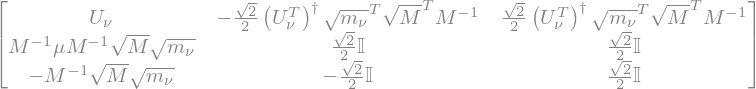

In [56]:
U_approx2.subs(mD, mD_CI).expand().subs(Dagger(Unu)*Unu, I3).simplify()

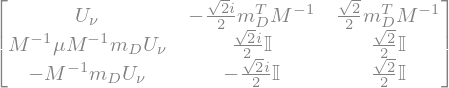

In [53]:
O = BlockMatrix([
    [I3, Z3, Z3],
    [Z3, I*I3, Z3],
    [Z3, Z3, I3]
])
block_collapse(U_approx2*O)

In [30]:
from block_diagonalization_iss_new import U_approx2, U_approx3, UL, UR, US, Unu, mD

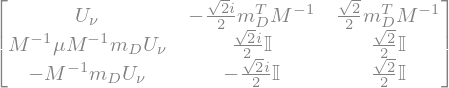

In [31]:
O = BlockMatrix([
    [I3, Z3, Z3],
    [Z3, I*I3, Z3],
    [Z3, Z3, I3]
])
block_collapse(U_approx2*O)

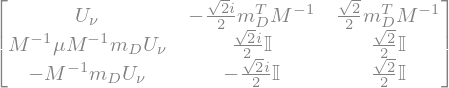

In [32]:
U_approx3

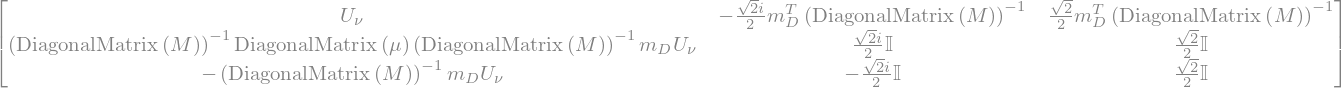

In [33]:
U_approx4 = U_approx3.subs(M,DiagonalMatrix(M)).subs(mu,DiagonalMatrix(mu))
U_approx4

In [53]:
from sympy import eye, solve

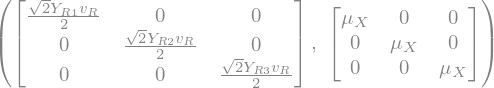

In [35]:
YR1, YR2, YR3 = symbols('Y_{R1} Y_{R2} Y_{R3}', positive=True)
vR = symbols('v_R', positive=True)
MR1 = YR1*vR/sqrt(2)
MR2 = YR2*vR/sqrt(2)
MR3 = YR3*vR/sqrt(2)
muX = symbols(r'\mu_X', positive=True)
eye3 = eye(3)
Mu = muX*eye3
MM = Matrix(
    [
        [MR1, 0, 0],
        [0, MR2, 0],
        [0, 0, MR3]
    ]
)
MM, Mu

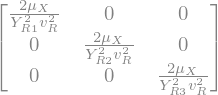

In [36]:
Mdiag = MM.inv()*Mu*MM.inv()
Mdiag

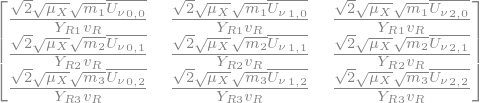

In [37]:
m1, m2, m3 = symbols('m_{1} m_{2} m_{3}', positive=True)
mnu = Matrix(
    [
        [m1, 0, 0],
        [0, m2, 0],
        [0, 0, m3]
    ]
)
mD_CI = Mdiag.applyfunc(sqrt)*mnu.applyfunc(sqrt)*Dagger(Unu.as_explicit())
mD_CI

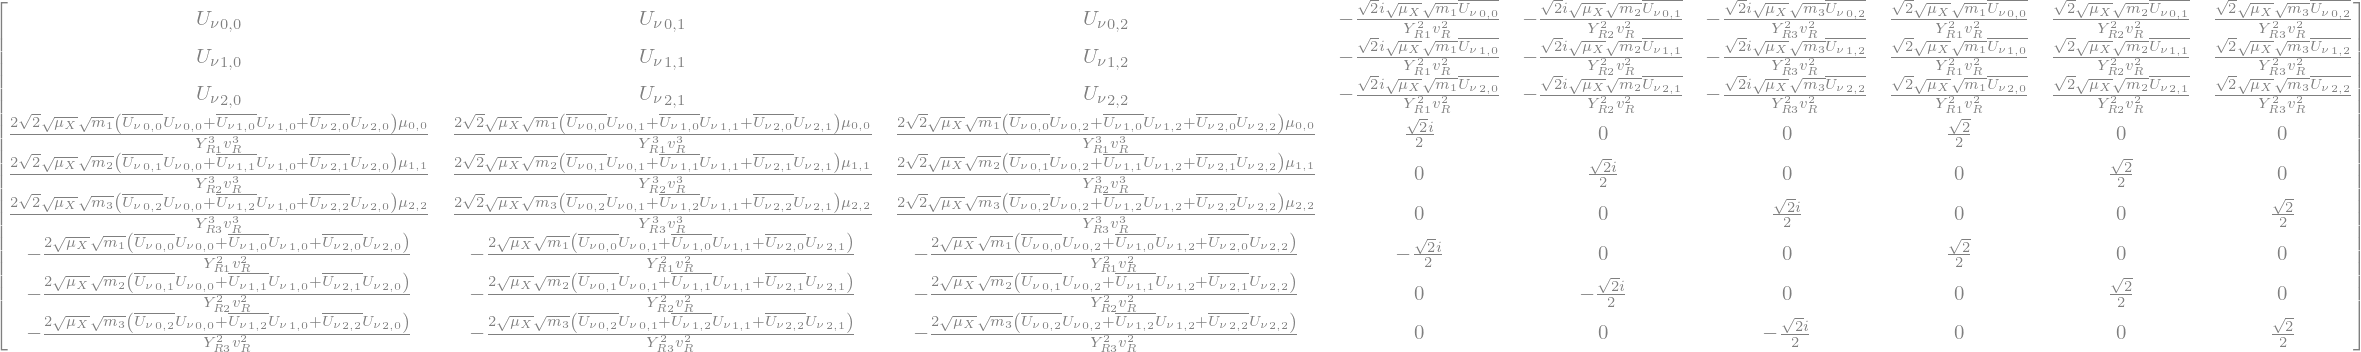

In [45]:
U_approx5 = U_approx4.as_explicit().subs(
    {mD[i,j]: mD_CI[i,j] for i in range(3) for j in range(3)}
).applyfunc(lambda x:x.factor()).subs(
    {M[i,j]:MM[i,j] for i in range(3) for j in range(3)},
)
U_approx5

In [46]:
UnuDaggerUnu = block_collapse(Dagger(Unu)*Unu).as_explicit()
UnuUnuDagger = block_collapse(Unu*Dagger(Unu)).as_explicit()

unitarity_conditions_UnuDaggerUnu = {
    UnuDaggerUnu[0,0]: 1,
    UnuDaggerUnu[1,1]: 1,
    UnuDaggerUnu[2,2]: 1,
    UnuDaggerUnu[0,1]: 0,
    UnuDaggerUnu[0,2]: 0,
    UnuDaggerUnu[1,0]: 0,
    UnuDaggerUnu[1,2]: 0,
    UnuDaggerUnu[2,0]: 0,
    UnuDaggerUnu[2,1]: 0
}

unitarity_conditions_UnuUnuDagger = {
    UnuUnuDagger[0,0]: 1,
    UnuUnuDagger[1,1]: 1,
    UnuUnuDagger[2,2]: 1,
    UnuUnuDagger[0,1]: 0,
    UnuUnuDagger[0,2]: 0,
    UnuUnuDagger[1,0]: 0,
    UnuUnuDagger[1,2]: 0,
    UnuUnuDagger[2,0]: 0,
    UnuUnuDagger[2,1]: 0
}

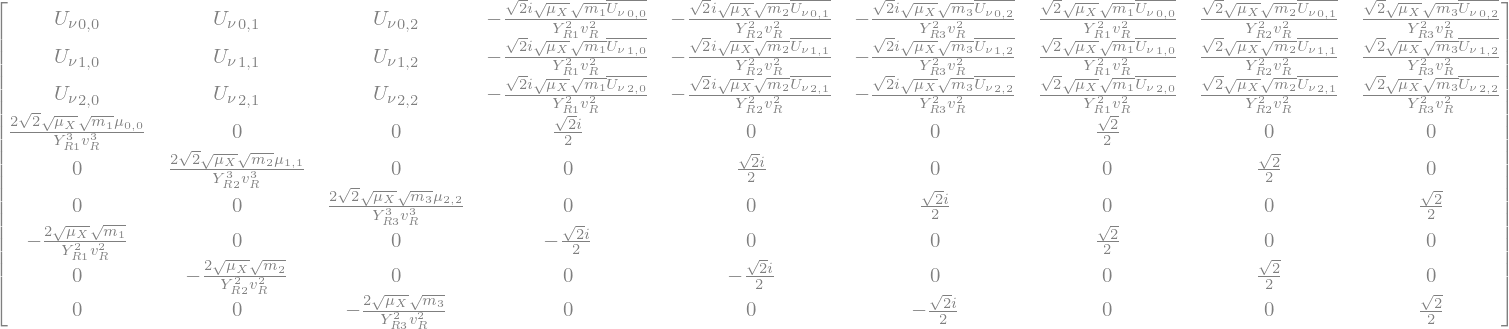

In [47]:
U_approx6 = U_approx5.subs(unitarity_conditions_UnuDaggerUnu).subs(unitarity_conditions_UnuUnuDagger)
U_approx6

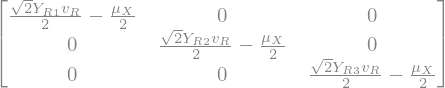

In [50]:
MMminus = MM - Mu/2
MMminus

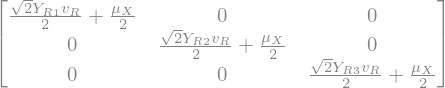

In [52]:
MMplus = MM + Mu/2
MMplus

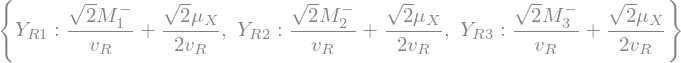

In [58]:
M1m, M2m, M3m = symbols('M_{1}^- M_{2}^- M_{3}^-', positive=True)
YR_sol = solve([MMminus[0, 0] - M1m, MMminus[1, 1] - M2m, MMminus[2, 2] - M3m], [YR1, YR2, YR3], dict=True)[0]
YR_sol

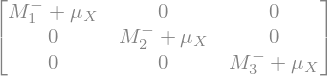

In [61]:
MMplus.subs(YR_sol).applyfunc(lambda x:x.factor())

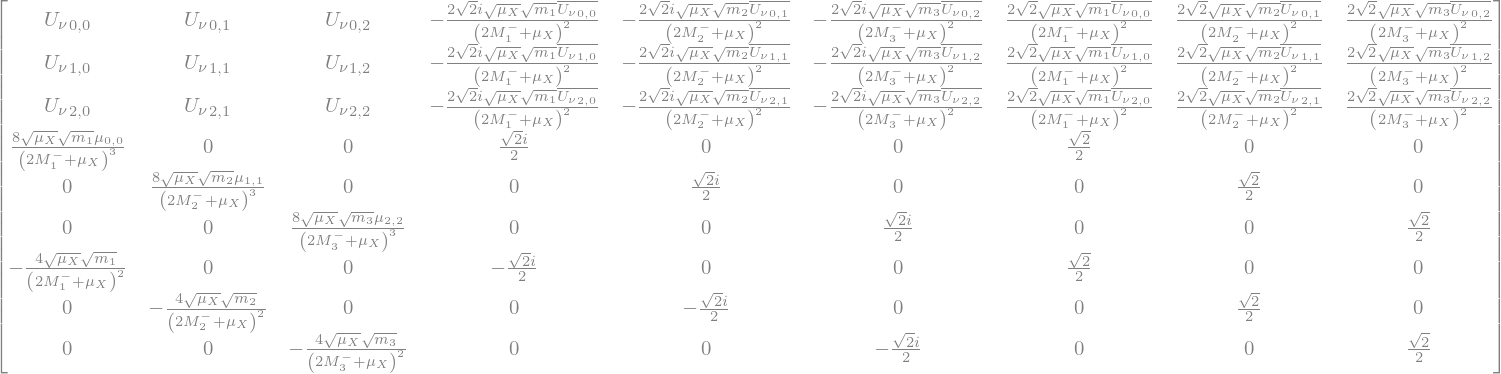

In [63]:
U_approx6.subs(YR_sol).applyfunc(lambda x:x.factor())